# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

**Does the Smartcab move at all during the simulation?**

|               Result                                   | Adjustment  |
| :--:                                                   | :-:         |
| Agent properly idled at a red light                    | +++ |
| Agent idled at a green light with oncoming traffic     | 000 |
| Agent idled at a green light with no oncoming traffic. | --- |

Reward or punishment are given based on how agent behave on the traffic light (stops on the red, do not stop on green). 

But if we go to the code, at this point "action = None". So, no movement.


**What kind of rewards is the driving agent receiving?**

Agent receiving float point numerical reward. Range seems to be "-6 < x < 3"


**How does the light changing color affect the rewards?**

If light is green agent should go, otherwise it will have negative reward. If the light if red, agent should stop in order to receive positive reward. So, agent will avoid breaking on green, but it really only got reward when agent stops on red. Since we know that agent does not move, make sense that only way to earn points is to stay on the red light.
Biggest punishment for green light also make sense. We don’t want our agent to stay on green.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

**How flags in agent.py change simulation?**

Change *environment*:
 
 - verbose - see additional output information in console. If agent is limited in number of steps, reach destination or do action; this parameter will print this activity. Information is usefull to debug.
 
 - num_dummies - number of other smartcars, that will basically interfere with our car. 100 by default
 
 - grid_size - size of the game board. 8 by 6 by default
 
**What Environment class function is called when an agent performs an action?**

******
inputs = self.env.sense(self)           # Visual input - intersection light and traffic
deadline = self.env.get_deadline(self)  # Remaining deadline
******
Functions sense and get_deadline are called. Class is Environment(object).

**Difference between the 'render_text()' function and the 'render()' function**

 - render - use "pygame.draw" to show the game using GUI.
 
 - render_text - whow game in text mode in console.

**Will the 'next_waypoint() function consider the North-South or East-West direction first?**

Sinse one of the first things we do there is "check if destination is cardinally East or West of location", meaning that agent first decide if it will go east or west. The answer is **East-West**.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


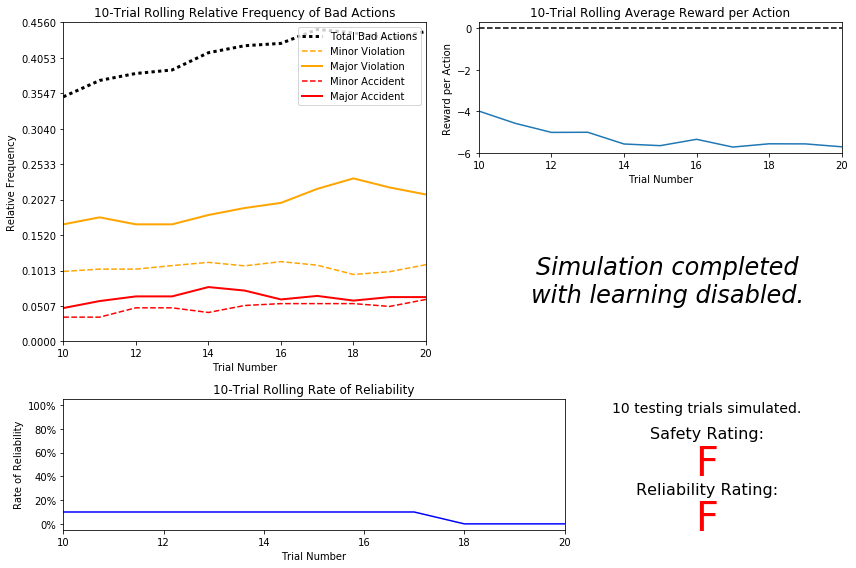

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

**How frequently is the driving agent making bad decisions?**

That depends from how you interpret the question. In one case all decisions are bad, sine none of the combinations of that decisions lead us to the goal.

In general, agent make bad decisions about half of the time. Given the random nature, make sense.

**How many of those bad decisions cause accidents?**

Around 5% of decisions led to accident.

**Given that the agent is driving randomly, does the rate of reliability make sense?**

It is going to 0. Which is expected, since car does not move towards the goal.

**What kind of rewards is the agent receiving for its actions?**

++ for going on green
-- for staying on green
++ for staying on red
-- for going on red
-- Major traffic violation
-- Minor traffic violation causing an accident
-- Major accident


**Do the rewards suggest it has been penalized heavily?**

Most of "rewards" have negative scores, and play roles of penalty. In addition, when time limit is set up for agent penalty for everything grows every move.

**As the number of trials increases, does the outcome of results change significantly?**

Total bad decisions grow pretty big. But I guess, that is due to the nature of bad decision themselves, more you go randomly, more frequently you will bump into issues. All other result is in completely the same estimate ranges.

**Would this Smartcab be considered safe and/or reliable for its passengers?**

No and no. It can’t get me where I want to and cannot do it safely.

**Why or why not?**

Because it makes random decisions, based on nothing. So, only way you can get where you need is highly unlikely luck.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

**Which and why?**

**Keep:**

'waypoint' - our goal. It is the only thing that point us in the right direction. Let's keep it.
'light' - we need the color to know when to stop. No other source.
'oncoming' - oncoming cars are potential danger and should be considered first before turning left for instance.

**Trash:**

'deadline' - it is iterative value. Would create too much environments.
'left' & 'right' - are discredited for the same reason. They add too much factors, without getting too much value in return. If necessary, we can mix them in the single factor in the future, if model require more information to stay safe.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

| Feature     | Count      | 
| :--: | :--: |
|'waypoint' | 3|
|'light' | 2 |
|'oncoming' | 4 |


In total, we have 24 possible combinations. All cases can be found in the table bellow.







| #   | Waypoint | Outcomming | Light
| :-: |   :-:    |     :-:    | :-:
| 1 | front | front | red
| 2 | front | front | green
| 3 | front | right | red
| 4 | front | right | green
| 5 | front | left | red
| 6 | front | left | green
| 7 | front | none | red
| 8 | front | none | green
| 9 | right | front | red
| 10 | right | front | green
| 11 | right | right | red
| 12 | right | right | green
| 13 | right | left | red
| 14 | right | left | green
| 15 | right | none | red
| 16 | right | none | green
| 17 | left | front | red
| 18 | left | front | green
| 19 | left | right | red
| 20 | left | right | green
| 21 | left | left | red
| 22 | left | left | green
| 23 | left | none | red
| 24 | left | none | green



### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [8]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

**Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?**

If we talk about accidents and bad behaviour in general, it all went slightly down (improved). What stayed roughly the same is rate of reliability. It raised a bit towards the end, but we can clearly see, that current system is not sufficient, as reliability does not go above 50% and actually started to decay towards the end of graph.

**Approximately how many training trials did the driving agent require before testing?**

$$ \epsilon = \epsilon / 0.05 $$

So 1 / 0.05 = 20

**Does that number make sense given the epsilon-tolerance?**

Yes, it decays fast.

**Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?**

Yes, linear decay.

**As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?**

Yes and yes. Agent definitely figured out how to behave safer, then before and obey some traffic rules. As the result receive less punishment (we discussed above, that reward system is heavy on punishment) and rewards per action got better. However not till the point, when number is positive.

**How does the safety and reliability rating compare to the initial driving agent?**

I would say it is similar. We got some improvements on safety, but we are not in the point, where this smart cab is at least usable and we perform just slightly better then chance.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

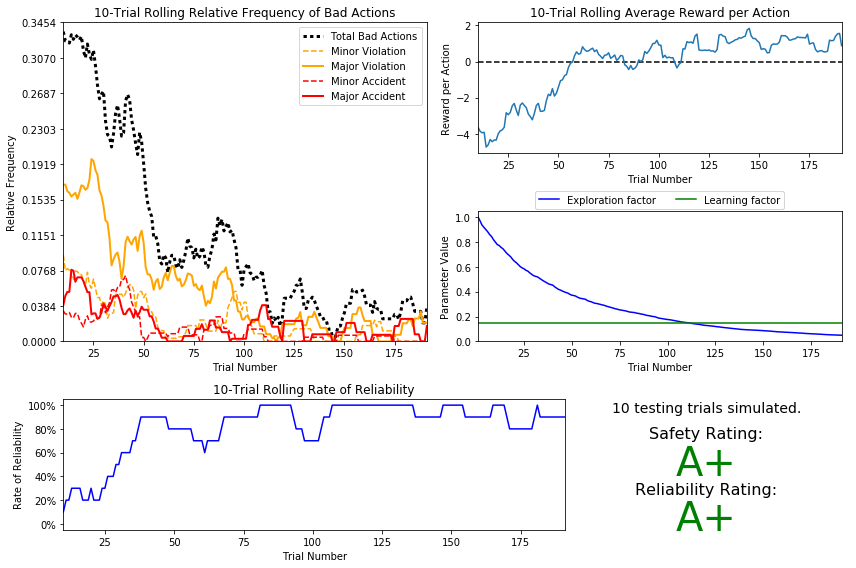

In [11]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

**What decaying function was used for epsilon (the exploration factor)?**

It was a bit of trial and error, but I stopped on "self.epsilon = math.exp( -0.001 * self.step )"
Exponent gives us nice smooth line, so it is easy to control learning rate and we have an option to get smaller steps as numbers are getting smaller, which is important considering large amount of possible scenarios, that we have. There is need to let agent train for a while.

**Approximately how many training trials were needed for your agent before beginning testing?**

About 170-175. Graph go over 180 and testing is last 10 trials.

**What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?**

 - Epsilon = 0.5
 
 - Alpha = 0.15
 
Epsilon and alpha adjustments are variable factors. I used different values for both, and that is result, that performed consistently better. Higher Alpha does not change much, however increase spread for safety, increasing learning rate bring us to similar results, so we are in area of some sort of overfitting. Which is also a reason why learning rate was not discounted. On current model different approaches were tried. And even when we set small number for learning rate, give model learn for longer with higher epsilon, we actually got worse results.

Epsilon adjustment was typically between 0.4 and 0.9, with larger number of epsilon agent tend to ignore public safety, but goes for the target with usually better reliability. We want to find a balance between going to the goal and driving safely. 0.5 hit this sweet spot more consistently, then other methods. Also,as we can see rate of reliability flattened out.


**How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?**

A lot. Now we have something, that actually works great. I ran multiple tests with consistent A+ ratings for both safety and reliability.

**Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?**

I was not able to get consistent A+ results, so Q learner figured out all possible danger scenarios and learned how to overcome it.

**Are you satisfied with the safety and reliability ratings of the Smartcab?**

Yes. During the trial process, I ran a lot of tests. All of them ended up with A+ for reliability and safety.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

24 log entries.:

 1) Green light. Oncoming car going forward, waypoint forward. Agent is going forward. Make sense, nothing in the way.
 
 2) Red light, oncoming car go left, waypoint is on the left. Stay on red.
 
 3) ...
 
It is pointless do describe all points. I will concentrate on interesting ones. Generally I am happy with policy, car know how to use traffic lights and avoid accidents even if that mean to get to waypoint longer.

The only one I could find is:

 - 'Light': 'green', 'Oncoming': 'left', 'Waypoint': 'left'} - action weights: forward : 0.36, right : 0.73, None : 0.33, left : 1.93
 
 
As we can see action left was chosen, when oncoming car is also turning left. That does not imply something bad, but dangerous. Other then turning. I do not really see any issues. Car always stay on red light, always goes on green, seem to avoid other cars.

There are some strange behaviour. For example in this case:


{'light': 'green', 'oncoming': 'forward', 'waypoint': 'left'}
 -- forward : 0.40
 -- right : 0.83
 -- None : -3.50
 -- left : -9.40


I would think of staying and letting oncoming car pass. But agent turn right. That is likely to be because of the large fines for staying on green, so agent would rather move here.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Yes. It is due to the "penalty = (math.pow(gradient, fnc) - 1) / (gradient - 1)". Penalty is gradient function, which discounts rewards over trial time. So, the way penalty is constructed it pushes agent to be as good in getting to destination as possible. Introducing additional reward for getting to final destination will only create more traffic violations.

In addition agent can only see local world around him. There is no way for agent to know total number of steps that he will need to take in order to get to the goal in advance. I fact, agent only know that he reached the goal after he hits it; and after he hits it, there is no extra reward. As the result future rewards would not be able to affect the agent due to random nature of the environment; steps agent need to take in order to get to the goal; limited view of the agent that does not allow him to plan the route in advance. Agent can only react for his surroundings.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.